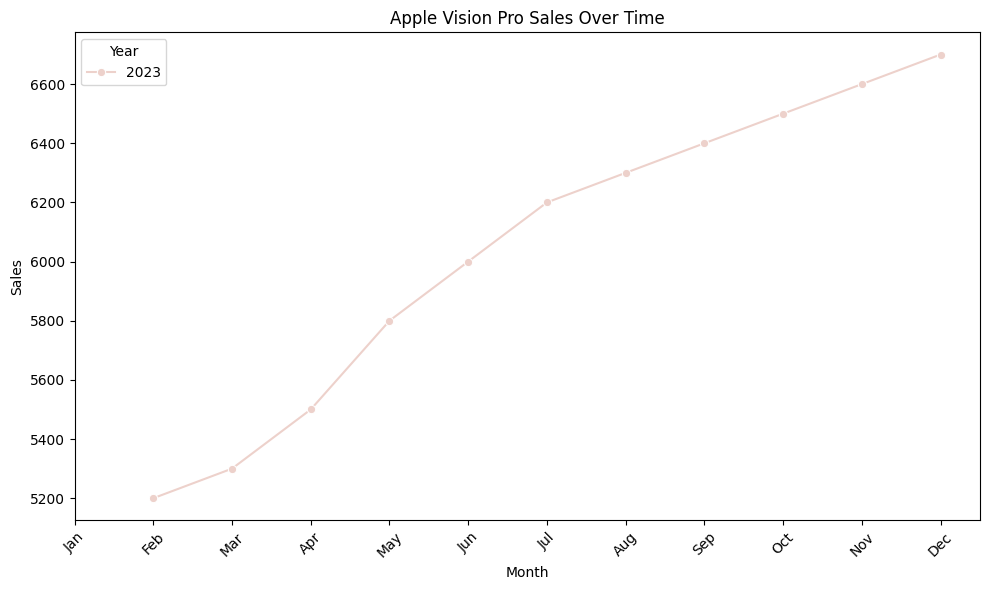

Mean Squared Error: 18776.0
R^2 Score: 0.9458384615384615
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
    Year  Month  Promotion  Prev_Month_Sales  Predicted_Sales
0   2024      1          0              6700           5940.0
1   2024      2          0              6700           5940.0
2   2024      3          0              6700           5940.0
3   2024      4          0              6700           5956.0
4   2024      5          0              6700           6019.0
5   2024      6          1              6700           6195.0
6   2024      7          1              6700           6320.0
7   2024      8          0              6700           6437.0
8   2024      9          0              6700           6481.0
9   2024     10          0              6700           6519.0
10  2024     11          0              6700           6552.0
11  2024     12          1              6700           6605.0


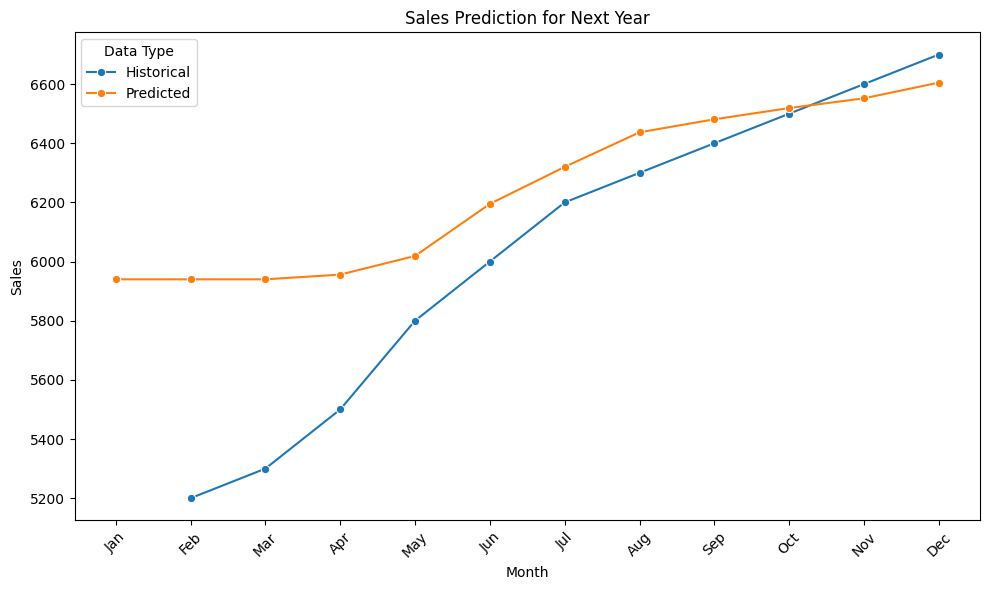

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os

# Load the data
apple_products = r'C:\Users\Anuval Mohan sai\Desktop\Project P0\apple_vision_pro_sales.csv'
df = pd.read_csv(apple_products)

# Data Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Promotion'] = df['Month'].apply(lambda x: 1 if x in [6, 7, 12] else 0)
df['Prev_Month_Sales'] = df['Sales'].shift(1)
df = df.dropna()  # Drop rows with NaN values

# Exploratory Data Analysis (EDA)
if not os.path.exists('plots'):S
    os.makedirs('plots')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Apple Vision Pro Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.savefig('plots/sales_over_time.png')
plt.show()

# Prepare Data for Prediction
X = df[['Year', 'Month', 'Promotion', 'Prev_Month_Sales']]
y = df['Sales']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
model = grid_search.best_estimator_

# Predict Sales for Next Year
next_year = 2024
future_months = pd.DataFrame({
    'Year': [next_year] * 12,
    'Month': list(range(1, 13)),
    'Promotion': [1 if month in [6, 7, 12] else 0 for month in range(1, 13)],
    'Prev_Month_Sales': [df['Sales'].iloc[-1]] * 12  # Use the last known sales value
})

future_sales = model.predict(future_months)

# Display predicted future sales
future_sales_df = future_months.copy()
future_sales_df['Predicted_Sales'] = future_sales

print(future_sales_df)

# Combine historical and future sales data for plotting
df['Type'] = 'Historical'
future_sales_df['Type'] = 'Predicted'
plot_data = pd.concat([df, future_sales_df.rename(columns={'Predicted_Sales': 'Sales'})])

# Plot Future Sales Prediction
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='Month', y='Sales', hue='Type', marker='o')
plt.title('Sales Prediction for Next Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Data Type')
plt.tight_layout()
plt.savefig('plots/sales_prediction.png')
plt.show()
